<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4 (Group 5) - Multi-Classification of Stroke, Mild Stroke and No Stroke

> Authors: Suen Si Min, Lee Hongwei, Irfan Muzafar (Group 5)
---

**Problem Statement:**  
How might we help patients confidently assess if they experienced a mild stroke, using a precise and sensitive classification model?

**Target Audience:** <br>
National Institute of Health Board Members with representatives from medical and non-medical departments

**Summary:**
- Members of public are strongly recommended to visit the emergency department when they experience partial body numbness, however the causes of partial body numbness can range from anxiety, to pinched nerves or in severe cases - a mild stroke. A mild stroke (scientifically known as Transient Ischemic Attack (TIA)) can be life threatening if not addressed early.
- The current protocol is to account for the worst case scenario, however this is costly on medical resources and causes unnecessary stress for patients.
- Develop a multi-classification model to differentiate stroke, mild stroke and no stroke.
- Training data: `diabetes_012_health_indicators_BRFSS2015.csv`
- References:  
    - [Stroke Facts](https://www.cdc.gov/stroke/facts.htm)
    - [Transient Ischemic Attack (TIA)](https://www.stroke.org/en/about-stroke/types-of-stroke/tia-transient-ischemic-attack)
    - [Hyperglycemia Symptoms](https://www.yalemedicine.org/conditions/hyperglycemia-symptoms-causes-treatments)
    - [Pinched Nerve Symptoms](https://www.healthline.com/health/neck-pain/cervical-radiculitis)
    - [Anxiety Symptoms](https://www.healthline.com/health/anxiety-numbness)
    - [Growing Economic Impact of Stroke](https://www.news-medical.net/news/20231009/New-report-forecasts-growing-health-and-economic-impacts-from-stroke-between-2020-and-2050.aspx)

**Background Information:**
- About 240,000 people in the United States experience a TIA every year
- About 1 in 5 people who have a suspected TIA will have a stroke within 90 days
- Symptoms can mimic other neurological symptoms, so it’s best to get a detailed evaluation
    - Symptoms: Partial numbness, slurred speech, blurred vision, dizzyness/headache
    - Other diagnoses: Migraines, Low Blood Sugar, High Blood Sugar, Pinched Nerve, Anxiety Attacks
- The number of people who die from stroke globally is estimated to increase by 50% by 2050 to 9.7 million deaths per year, with annual costs as high as US$2.3 trillion possible

There are a total of four notebooks for this project:  
 1. `01_Data_Cleaning_EDA.ipynb`   
 2. `02_Modelling_Evaluation.ipynb`   
 3. `03_Clustering_Reclassification.ipynb`
 4. `04_Cluster_Exploration_Conclusion.ipynb` 

---
**This Notebook**
- We will clean the data for `diabetes_012_health_indicators_BRFSS2015.csv`.
- Conduct some EDA to gather insights

# **Part 1 - Data Cleaning**

# 1. Data Dictionary

| No. | Column | Description       |
|-----|------------------------------------------|--------------------------------------------------------|
| 1   | Diabetes_012 | 0 is no diabetes, 1 is prediabetes, 2 is diabetes                       
| 2   | HighBP | 1 if surveyee has high blood pressure, else 0             
| 3   | HighChol | 1 if surveyee has high cholesterol, else 0              
| 4   | CholCheck | 1 if surveyee has done cholesterol check in last 5 years, else 0
| 5   | BMI | surveyee's body mass index                                    
| 6   | Smoker | 1 if surveyee smoked at least 100 cigarettes in entire life, else 0
| 7   | Stroke | 1 if surveyee ever had a stroke, else 0
| 8   | HeartDiseaseorAttack  | 1 if surveyee had coronary heart disease or myocardinal infarction, else 0
| 9   | PhysActivity  | 1 if surveyee did physical activity in past 30days, else 0
| 10  | Fruits | 1 if surveyee consume fruit one or more times per day, else 0
| 11  | Veggies | 1 if surveyee consume vegetables one or more times per day, else 0
| 12  | HvyAlcoholConsump | - for men: 1 if he had more than 14 drinks per week <br>- for women: 1 if she had more than 7 drinks per week, else 0
| 13  | AnyHealthcare | 1 if surveyee has any healthcare coverage, else 0
| 14  | NoDocbcCost  | 1 if for past 12 months, surveyee needed to see doctor but couldnt because of cost, else 0
| 15  | GenHlth | what surveyee thinks his/her general health is, scale 1-5, 5 is poor and 1 is excellent
| 16  | MentHlth | for how many days out of the last 30 days surveyee faces problems with mental health, which includes stress, depression, and problems with emotions  
| 17  | PhysHlth | for how many days out of the last 30 days surveyee faces problems with physical health, which includes physical illness and injury
| 18  | DiffWalk | 1 if surveyee has difficulty walking or climbing stairs, else 0
| 19  | Sex  | 1 is male, 0 is female
| 20  | Age | 13-level age category <br>- 1: 18-24 <br>- 2: 25-29 <br>- 3: 31-34 <br>- 4: 35-39 <br>- 5: 40-44 <br>- 6: 45-49 <br>- 7: 50-54 <br>- 8: 55-59 <br>- 9: 60-64 <br>- 10: 65-69 <br>- 11: 70-74 <br>- 12: 75-79 <br>- 13: 80 or older
| 21  | Education | Highest grade of school completed <br>- 1: never attended school or only kindergarten <br>- 2: grades 1 to 8 (elementary) <br>- 3: grades 9 to 11 (high school) <br>- 4: grade 12 or GED (high school graduate) <br>- 5: college 1 year to 3 years <br>- 6: college 4 years or more
| 22  | Income | Annual household income (USD) <br>- 1: Less than $10,000 <br>- 2: $10,000 to less than $15,000 <br>- 3: $15,000 to less than $20,000 <br>- 4: $20,000 to less than $25,000 <br>- 5: $25,000 to less than $35,000 <br>- 6: $35,000 to less than $50,000 <br>- 7: $50,000 to less than $75,000 <br>- 8: $75,000 or more

# 2. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
# Set a random seed to reproduce the same results across all.
np.random.seed(42)
pd.set_option('display.max_columns', 25)

# 3. Read CSV

In [3]:
# read data csv
df = pd.read_csv('../datasets/diabetes_012_health_indicators_BRFSS2015.csv')

In [4]:
# there are 253k rows and 22 columns
df.shape

(253680, 22)

In [5]:
# display first 5 rows
df.head()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           0.0     0.0      1.0                0.0   
1                   0.0           1.0     0.0      0.0                0.0   
2                   0.0           0.0     1.0      0.0                0.0   
3                   0.0           1.0     1.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                0.0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0            1.0          0.0      5.0      18.0      15.0       1.0  0.0   
1            0.0          1.0      3.0       0.0       0.0       0.0  0.0   
2            1.0          1.0      5.0      30.0      30.0       1.0  0.0   
3            1.0          0.0      2.0       0.0       0.0       0.0  0.0   
4            1.0          0.0      2.0       3.0       0.0       0.0  0.0   

    Age  Education  Income  
0   9.0        4.0     3.0  
1   7.0        6.0     1.0  
2   9.0        4.0     8.0  
3  11.0        3.0     6.0  
4  11.0        5.0     4.0

# 4. Check null values and data types

In [6]:
# check number of null values per column
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

**Observation**<br>
There are NO null values in the dataset. From here, lets analyse the data types.

In [7]:
# showing null count and data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

**Observation**<br>
They are all floats. However, the values are discrete, therefore we want to convert them to integer values.

In [8]:
# convert all datatypes from float to integer
df = df.astype(int)

In [9]:
# check if the cell above was done
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

# 5. Standardize columns case

In [10]:
# change all columns to lower case for consistency
df.columns = [x.lower() for x in df.columns]

In [11]:
# check if the cell above was done
df.head()

diabetes_012  highbp  highchol  cholcheck  bmi  smoker  stroke  \
0             0       1         1          1   40       1       0   
1             0       0         0          0   25       1       0   
2             0       1         1          1   28       0       0   
3             0       1         0          1   27       0       0   
4             0       1         1          1   24       0       0   

   heartdiseaseorattack  physactivity  fruits  veggies  hvyalcoholconsump  \
0                     0             0       0        1                  0   
1                     0             1       0        0                  0   
2                     0             0       1        0                  0   
3                     0             1       1        1                  0   
4                     0             1       1        1                  0   

   anyhealthcare  nodocbccost  genhlth  menthlth  physhlth  diffwalk  sex  \
0              1            0        5        18        15         1    0   
1              0            1        3         0         0         0    0   
2              1            1        5        30        30         1    0   
3              1            0        2         0         0         0    0   
4              1            0        2         3         0         0    0   

   age  education  income  
0    9          4       3  
1    7          6       1  
2    9          4       8  
3   11          3       6  
4   11          5       4

# 6. Feature Selection & Data Validation

The `cholcheck` feature, which indicates whether a surveyee has had their blood cholesterol checked in the last 5 years, does not establish a causal relationship with the occurrence of stroke. The act of checking cholesterol is a preventive or diagnostic measure and does not inherently influence the likelihood of experiencing a stroke. By removing the `cholcheck` feature, we simplify our feature set and reduce model complexity. Focusing on relevant predictors that have a more direct impact on stroke risk enhances the interpretability and predictive power of our model. Thus, we will remove the `cholcheck` column.

In [12]:
# dropping the `cholcheck` column
df.drop(columns='cholcheck', inplace=True)

Let's explore the summary statistics for each column for more insights.

In [13]:
# summary statistics
df.describe().T

count       mean       std   min   25%   50%   75%  \
diabetes_012          253680.0   0.296921  0.698160   0.0   0.0   0.0   0.0   
highbp                253680.0   0.429001  0.494934   0.0   0.0   0.0   1.0   
highchol              253680.0   0.424121  0.494210   0.0   0.0   0.0   1.0   
bmi                   253680.0  28.382364  6.608694  12.0  24.0  27.0  31.0   
smoker                253680.0   0.443169  0.496761   0.0   0.0   0.0   1.0   
stroke                253680.0   0.040571  0.197294   0.0   0.0   0.0   0.0   
heartdiseaseorattack  253680.0   0.094186  0.292087   0.0   0.0   0.0   0.0   
physactivity          253680.0   0.756544  0.429169   0.0   1.0   1.0   1.0   
fruits                253680.0   0.634256  0.481639   0.0   0.0   1.0   1.0   
veggies               253680.0   0.811420  0.391175   0.0   1.0   1.0   1.0   
hvyalcoholconsump     253680.0   0.056197  0.230302   0.0   0.0   0.0   0.0   
anyhealthcare         253680.0   0.951053  0.215759   0.0   1.0   1.0   1.0   
nodocbccost           253680.0   0.084177  0.277654   0.0   0.0   0.0   0.0   
genhlth               253680.0   2.511392  1.068477   1.0   2.0   2.0   3.0   
menthlth              253680.0   3.184772  7.412847   0.0   0.0   0.0   2.0   
physhlth              253680.0   4.242081  8.717951   0.0   0.0   0.0   3.0   
diffwalk              253680.0   0.168224  0.374066   0.0   0.0   0.0   0.0   
sex                   253680.0   0.440342  0.496429   0.0   0.0   0.0   1.0   
age                   253680.0   8.032119  3.054220   1.0   6.0   8.0  10.0   
education             253680.0   5.050434  0.985774   1.0   4.0   5.0   6.0   
income                253680.0   6.053875  2.071148   1.0   5.0   7.0   8.0   

                       max  
diabetes_012           2.0  
highbp                 1.0  
highchol               1.0  
bmi                   98.0  
smoker                 1.0  
stroke                 1.0  
heartdiseaseorattack   1.0  
physactivity           1.0  
fruits                 1.0  
veggies                1.0  
hvyalcoholconsump      1.0  
anyhealthcare          1.0  
nodocbccost            1.0  
genhlth                5.0  
menthlth              30.0  
physhlth              30.0  
diffwalk               1.0  
sex                    1.0  
age                   13.0  
education              6.0  
income                 8.0

**Observations & Insights**

- General Observations:
    - Total of 253,680 data points
    - 13 out of 21 features are binary
    - All features are discrete variables (e.g. no. of days, categories of age/education/income)
    - Education and Income features appear to be left-skewed
    - For `bmi`, the maximum value is 98.0, which seems unusual.
    - Recall the formula for BMI:
        $$\text{BMI} = 703 \times \frac{\text{Weight (in pounds)}}{\text{Height}^2\text{ (in inches)}}$$

    - Refer to [BMI Table by USA National Heart, Lung and Blood Institute](https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi_tbl.pdf):<br>
    Since they set the maximum BMI to be 54, we will drop rows that have BMI of higher than 54.
<br>
- We will proceed to further clean the data before relooking at the updated summary statistics to conduct further data analysis

In [14]:
# create dataframe for those with bmi greater than 54
bmi_54 = df[df['bmi'] > 54]
print(bmi_54.shape) # check number of rows for bmi_54
bmi_54.head()

(1357, 21)


diabetes_012  highbp  highchol  bmi  smoker  stroke  \
201              2       1         1   55       0       0   
670              2       1         0   59       0       0   
835              0       0         0   55       0       0   
1209             0       1         0   57       0       0   
1626             2       1         1   55       0       0   

      heartdiseaseorattack  physactivity  fruits  veggies  hvyalcoholconsump  \
201                      0             0       1        1                  0   
670                      0             1       1        0                  0   
835                      0             1       1        1                  0   
1209                     0             0       0        1                  0   
1626                     0             0       0        0                  0   

      anyhealthcare  nodocbccost  genhlth  menthlth  physhlth  diffwalk  sex  \
201               1            0        4         0        15         0    0   
670               0            1        3         0         0         0    0   
835               1            0        4         0         0         0    0   
1209              1            1        4        15        30         1    0   
1626              1            0        5        30        30         1    1   

      age  education  income  
201    11          5       2  
670     5          6       1  
835     2          5       5  
1209    7          6       4  
1626    5          6       1

Since the BMI outliers are comprised of less than 0.5% of our dataset, it will not significantly skew our dataset. Therefore, we drop these 1357 rows that have BMI greater than 54.

In [15]:
# drop the 1357 rows
df.drop(bmi_54.index, inplace=True)

In [16]:
# resetting index
df.reset_index(drop=True)
# there are 252323 rows now

diabetes_012  highbp  highchol  bmi  smoker  stroke  \
0                  0       1         1   40       1       0   
1                  0       0         0   25       1       0   
2                  0       1         1   28       0       0   
3                  0       1         0   27       0       0   
4                  0       1         1   24       0       0   
...              ...     ...       ...  ...     ...     ...   
252318             0       1         1   45       0       0   
252319             2       1         1   18       0       0   
252320             0       0         0   28       0       0   
252321             0       1         0   23       0       0   
252322             2       1         1   25       0       0   

        heartdiseaseorattack  physactivity  fruits  veggies  \
0                          0             0       0        1   
1                          0             1       0        0   
2                          0             0       1        0   
3                          0             1       1        1   
4                          0             1       1        1   
...                      ...           ...     ...      ...   
252318                     0             0       1        1   
252319                     0             0       0        0   
252320                     0             1       1        0   
252321                     0             0       1        1   
252322                     1             1       1        0   

        hvyalcoholconsump  anyhealthcare  nodocbccost  genhlth  menthlth  \
0                       0              1            0        5        18   
1                       0              0            1        3         0   
2                       0              1            1        5        30   
3                       0              1            0        2         0   
4                       0              1            0        2         3   
...                   ...            ...          ...      ...       ...   
252318                  0              1            0        3         0   
252319                  0              1            0        4         0   
252320                  0              1            0        1         0   
252321                  0              1            0        3         0   
252322                  0              1            0        2         0   

        physhlth  diffwalk  sex  age  education  income  
0             15         1    0    9          4       3  
1              0         0    0    7          6       1  
2             30         1    0    9          4       8  
3              0         0    0   11          3       6  
4              0         0    0   11          5       4  
...          ...       ...  ...  ...        ...     ...  
252318         5         0    1    5          6       7  
252319         0         1    0   11          2       4  
252320         0         0    0    2          5       2  
252321         0         0    1    7          5       1  
252322         0         0    0    9          6       2  

[252323 rows x 21 columns]

In [17]:
# displaying the column names in df
list(df.columns)

['diabetes_012',
 'highbp',
 'highchol',
 'bmi',
 'smoker',
 'stroke',
 'heartdiseaseorattack',
 'physactivity',
 'fruits',
 'veggies',
 'hvyalcoholconsump',
 'anyhealthcare',
 'nodocbccost',
 'genhlth',
 'menthlth',
 'physhlth',
 'diffwalk',
 'sex',
 'age',
 'education',
 'income']

**Rationale for keeping the remaining features**<br>
- Referring to [information](https://www.cdc.gov/stroke/risk_factors.htm) from Centers for Disease Control and Prevention (CDC), the risk factors of a stroke include `highbp`, `highchol`, `heartdiseaseorattack`, `diabetes_012` and `bmi`.

- We also have [information](https://www.cdc.gov/stroke/prevention.htm) for ways to prevent a stroke, which justifies our selection of `fruits`, `veggies`, `physactivity`, `physhlth`, `menthlth`, `genhlth`, `diffwalk`, `smoker` and `hvyalcoholconsump`.

- The other columns are demographic data such as `anyhealthcare`, `nodocbccost`, `sex`, `age`, `education` and `income`. For these columns, we are interested to see if there are any correlation.

# 7. Balancing Stroke and No Stroke

From here, we can check the number of rows for `got_stroke` and `no_stroke` dataframes.

In [18]:
# creating dataframes for stroke and no stroke separately
got_stroke = df[df['stroke']==1]
no_stroke = df[df['stroke']==0]
# checking number of rows for each dataframe
print(f'got_stroke has {got_stroke.shape[0]} rows.')
print(f'no_stroke has {no_stroke.shape[0]} rows.')

got_stroke has 10229 rows.
no_stroke has 242094 rows.


Our aim is create a classification model to predict stroke values. An imbalanced target variable will introduce bias to our model if one significantly outweighs the other. Thus, we will make the number of rows for `no_stroke` to be equal to the number of rows for `got_stroke`. So we sample 10,229 rows from the 242,094 rows for `no_stroke`.

In [19]:
# Sample 10,229 random rows from the no_stroke dataframe
sample_size = 10229
no_stroke = no_stroke.sample(n=sample_size)
# Display the sampled rows
no_stroke

diabetes_012  highbp  highchol  bmi  smoker  stroke  \
232642             0       0         0   24       0       0   
176159             0       0         1   24       0       0   
131228             0       1         1   28       0       0   
60503              2       1         1   28       1       0   
240132             2       0         1   24       1       0   
...              ...     ...       ...  ...     ...     ...   
2911               0       0         1   29       0       0   
142012             0       0         1   24       0       0   
209388             0       0         0   27       0       0   
188524             0       1         1   21       0       0   
112186             0       0         0   27       1       0   

        heartdiseaseorattack  physactivity  fruits  veggies  \
232642                     0             1       1        1   
176159                     0             1       1        1   
131228                     0             1       1        1   
60503                      1             1       0        1   
240132                     0             1       1        1   
...                      ...           ...     ...      ...   
2911                       0             1       0        1   
142012                     0             1       1        1   
209388                     0             1       0        0   
188524                     0             0       1        0   
112186                     0             0       0        0   

        hvyalcoholconsump  anyhealthcare  nodocbccost  genhlth  menthlth  \
232642                  0              1            0        1         0   
176159                  0              1            0        2         0   
131228                  0              1            0        2         0   
60503                   0              1            0        3         0   
240132                  0              1            0        1         0   
...                   ...            ...          ...      ...       ...   
2911                    0              1            0        1         0   
142012                  0              1            0        2         1   
209388                  0              1            0        2         0   
188524                  0              1            0        2         2   
112186                  0              1            0        4         0   

        physhlth  diffwalk  sex  age  education  income  
232642         0         0    1   12          6       7  
176159         0         0    1    7          4       8  
131228         5         0    0   10          6       8  
60503          0         0    1   11          3       6  
240132         1         0    0   10          6       7  
...          ...       ...  ...  ...        ...     ...  
2911           0         0    1    4          5       8  
142012         1         0    0    9          5       8  
209388         0         0    0   10          5       8  
188524         0         0    0   10          4       5  
112186        30         1    0   12          4       7  

[10229 rows x 21 columns]

In [20]:
# concatenate the got_stroke dataframe and the updated no_stroke dataframe and reset index
df = pd.concat([got_stroke,no_stroke])
df.reset_index(drop=True, inplace=True)

In [21]:
# check the number of rows
df.shape

(20458, 21)

In [22]:
# check if balanced
df['stroke'].value_counts(normalize=True)

stroke
1    0.5
0    0.5
Name: proportion, dtype: float64

In [23]:
# export to csv in datasets folder to be used in notebook 2
df.to_csv('../datasets/cleaned_data.csv', index=False)

---

# **Part 2 - Exploratory Data Analysis**

# 1. Summary Statistics

In [24]:
# Summary Statistics after Data Cleaning
df.describe().T

count       mean        std   min   25%   50%   75%  \
diabetes_012          20458.0   0.470085   0.835265   0.0   0.0   0.0   0.0   
highbp                20458.0   0.578600   0.493795   0.0   0.0   1.0   1.0   
highchol              20458.0   0.531675   0.499008   0.0   0.0   1.0   1.0   
bmi                   20458.0  28.477124   6.032792  14.0  24.0  27.0  32.0   
smoker                20458.0   0.513882   0.499819   0.0   0.0   1.0   1.0   
stroke                20458.0   0.500000   0.500012   0.0   0.0   0.5   1.0   
heartdiseaseorattack  20458.0   0.232183   0.422235   0.0   0.0   0.0   0.0   
physactivity          20458.0   0.694643   0.460570   0.0   0.0   1.0   1.0   
fruits                20458.0   0.620637   0.485240   0.0   0.0   1.0   1.0   
veggies               20458.0   0.775687   0.417139   0.0   1.0   1.0   1.0   
hvyalcoholconsump     20458.0   0.045459   0.208314   0.0   0.0   0.0   0.0   
anyhealthcare         20458.0   0.956203   0.204648   0.0   1.0   1.0   1.0   
nodocbccost           20458.0   0.106218   0.308123   0.0   0.0   0.0   0.0   
genhlth               20458.0   2.941343   1.185193   1.0   2.0   3.0   4.0   
menthlth              20458.0   4.378532   8.862555   0.0   0.0   0.0   3.0   
physhlth              20458.0   7.177388  11.028316   0.0   0.0   0.0  10.0   
diffwalk              20458.0   0.318360   0.465851   0.0   0.0   0.0   1.0   
sex                   20458.0   0.444178   0.496886   0.0   0.0   0.0   1.0   
age                   20458.0   8.933278   2.914968   1.0   7.0   9.0  11.0   
education             20458.0   4.887037   1.041636   1.0   4.0   5.0   6.0   
income                20458.0   5.458403   2.238800   1.0   4.0   6.0   8.0   

                       max  
diabetes_012           2.0  
highbp                 1.0  
highchol               1.0  
bmi                   54.0  
smoker                 1.0  
stroke                 1.0  
heartdiseaseorattack   1.0  
physactivity           1.0  
fruits                 1.0  
veggies                1.0  
hvyalcoholconsump      1.0  
anyhealthcare          1.0  
nodocbccost            1.0  
genhlth                5.0  
menthlth              30.0  
physhlth              30.0  
diffwalk               1.0  
sex                    1.0  
age                   13.0  
education              6.0  
income                 8.0

**Observations & Insights**

- General Observations:
    - Total of 20,458 data points
    - We can visualize the distributions of numerical variables like `bmi`, `genhlth`, `income`, `age`, `education` using histograms & bar charts to understand their distribution shapes and identify any outliers.
    -  Other variables are either binary or very few discrete variables (i.e. 0,1,2 for `diabetes_012`). Hence, distribution plots would not be applicable.

- Correlation Analysis:
    - Correlation coefficients between pairs of numerical variables are usually calculated to understand the relationships between them. However, it seems that all the variables in our dataset are categorical or discrete numerical, so correlation analysis wouldn't make sense for this dataset.

- For `bmi`,
    - Looking at the how the mean value relates to what we would expect from a general human population, it might be worth looking into its distribution.
    - It is interesting that the standard deviation is 6.032 which is a rather large deviation for BMI. Hence, it will be worth looking at box plots to see if there are outliers.

Next, we will look at the distributions for `bmi`, `genhlth`, `income`, `age`, `education`

---

# 2. Histograms & Bar Charts

### BMI Distribution

In [25]:
# Set the desired font size and rotation angle
font_size = 14
rotation_angle = 0

# Plot Histogram
fig = px.histogram(df, x='bmi')
fig.update_traces(bingroup=1, marker_color='#738BDE') # Assign bins
fig.update_layout(
    title=dict(text='BMI Distribution', font=dict(size=22)),  # Add title here
    xaxis_title='BMI',
    yaxis_title='Count',
    xaxis=dict(tickangle=rotation_angle, tickfont=dict(size=16), showgrid=True),  # Show vertical grid lines
    yaxis=dict(tickfont=dict(size=16)),
    height=800,  # Adjust the height as needed
    width=1300,  # Adjust the width as needed
    title_x=0.5,  # Set title's x coordinate to the center
    title_y=0.95,
    plot_bgcolor='rgba(0,0,0,0)',  # Set plot background color to fully transparent
    paper_bgcolor='rgba(0,0,0,0)'  # Set paper background color to fully transparent
)

# Update the x-label and y-label font sizes
fig.update_xaxes(title_font=dict(size=18))
fig.update_yaxes(title_font=dict(size=18))

fig.show()

**Observation & Interpretation:**

- BMI follows a normal distribution.
- Most people fall in the normal (19-24) to overweight (25-29) BMI range

### Bar Graph of General Health

In [26]:
# Set the desired font size and rotation angle
font_size = 14
rotation_angle = 0

# Plot bar graph
fig = px.histogram(df, x='genhlth')
fig.update_traces(bingroup=1,marker_color='#738BDE')  # Adjust marker color, Assign bins
fig.update_layout(
    title=dict(text='Bar Graph of General Health', font=dict(size=22)),  # Add title here
    xaxis_title='General Health',
    yaxis_title='Count',
    xaxis=dict(tickangle=rotation_angle, tickfont=dict(size=16)),
    yaxis=dict(tickfont=dict(size=16)),
    font=dict(size=font_size),
    height=700,  # Adjust the height as needed
    width=700,  # Adjust the width as needed
    title_x=0.5,  # Set title's x coordinate to the center
    title_y=0.95,
    bargap=0.1,
    plot_bgcolor='rgba(0,0,0,0)',  # Set plot background color to fully transparent
    paper_bgcolor='rgba(0,0,0,0)'  # Set paper background color to fully transparent
)

# Update the x-label and y-label font sizes
fig.update_xaxes(title_font=dict(size=18))
fig.update_yaxes(title_font=dict(size=18))

fig.show()

**Observation & Interpretation:**

- `genhlth` (5 is poor and 1 is excellent)

- Most people feel that their general health is good.

### Number of People in Each Income Group and Stroke Occurence in Percentage(%)

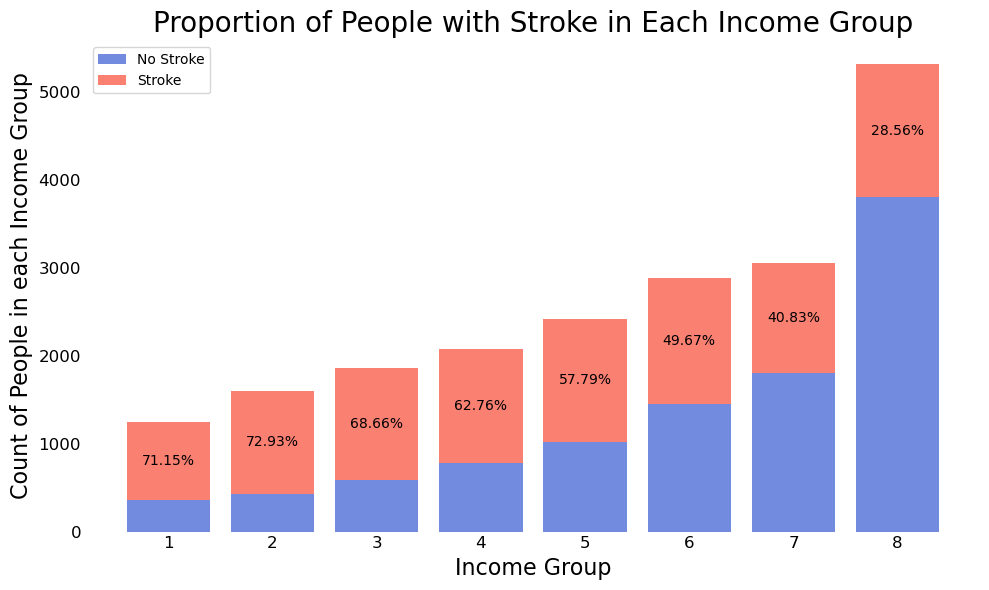

In [27]:
# Count the number of occurrences for each income group
income_counts = df['income'].value_counts()

# Reverse the order of income group values
income_counts = income_counts.iloc[::-1]

# Calculate the percentage of stroke occurrence for each income group
stroke_pct = df.groupby('income')['stroke'].mean() * 100
stroke_pct = stroke_pct.reindex(income_counts.index)

# Calculate the count of people who experienced a stroke in each age group
stroke_count = stroke_pct/100 * income_counts
no_stroke_count = income_counts-stroke_count

# Create a figure with a single subplot (stacked bar chart)
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the stacked bar chart for stroke occurrence in each income group
bars1 = ax.bar(income_counts.index, income_counts, color='#738BDE', label='No Stroke', zorder=2)
bars2 = ax.bar(income_counts.index, stroke_count, bottom=no_stroke_count, color='salmon', label='Stroke', zorder=2)

# Label the axes and set the title
ax.set_xlabel('Income Group', fontsize=16)
ax.set_ylabel('Count of People in each Income Group', fontsize=16)
ax.set_title('Proportion of People with Stroke in Each Income Group', fontsize=20)
ax.legend()

# Add horizontal and vertical grid lines behind the bars
ax.grid(axis='both', linestyle='-', color='white', linewidth=0.5, zorder=5)

# Add percentage labels to the bars
for bar, pct in zip(bars2, stroke_pct):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{pct:.2f}%', ha='center', va='center', color='black')

# Remove border lines around the entire plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove dashes from the ticks but keep the numbers
ax.tick_params(axis='both', which='both', length=0, labelsize=12)

fig.patch.set_facecolor('none') # Set plot background color to be transparent
ax.set_facecolor('none') # Set inner background of the plot to be transparent
ax.legend().get_frame().set_facecolor('none') # Set legend background color to be transparent

# Show the plot
plt.tight_layout()
plt.show()

**Interpretation:**

- The proportion of people who experienced a stroke is very high (~70% - 73%) in the 2 lowest income groups. This gradually decreases as income increases.
- It is also interesting to note that the number of people increases as income group increases, just for this sample specifically.

### Number of People in Each Age Group and Stroke Occurrence in Percentage(%)

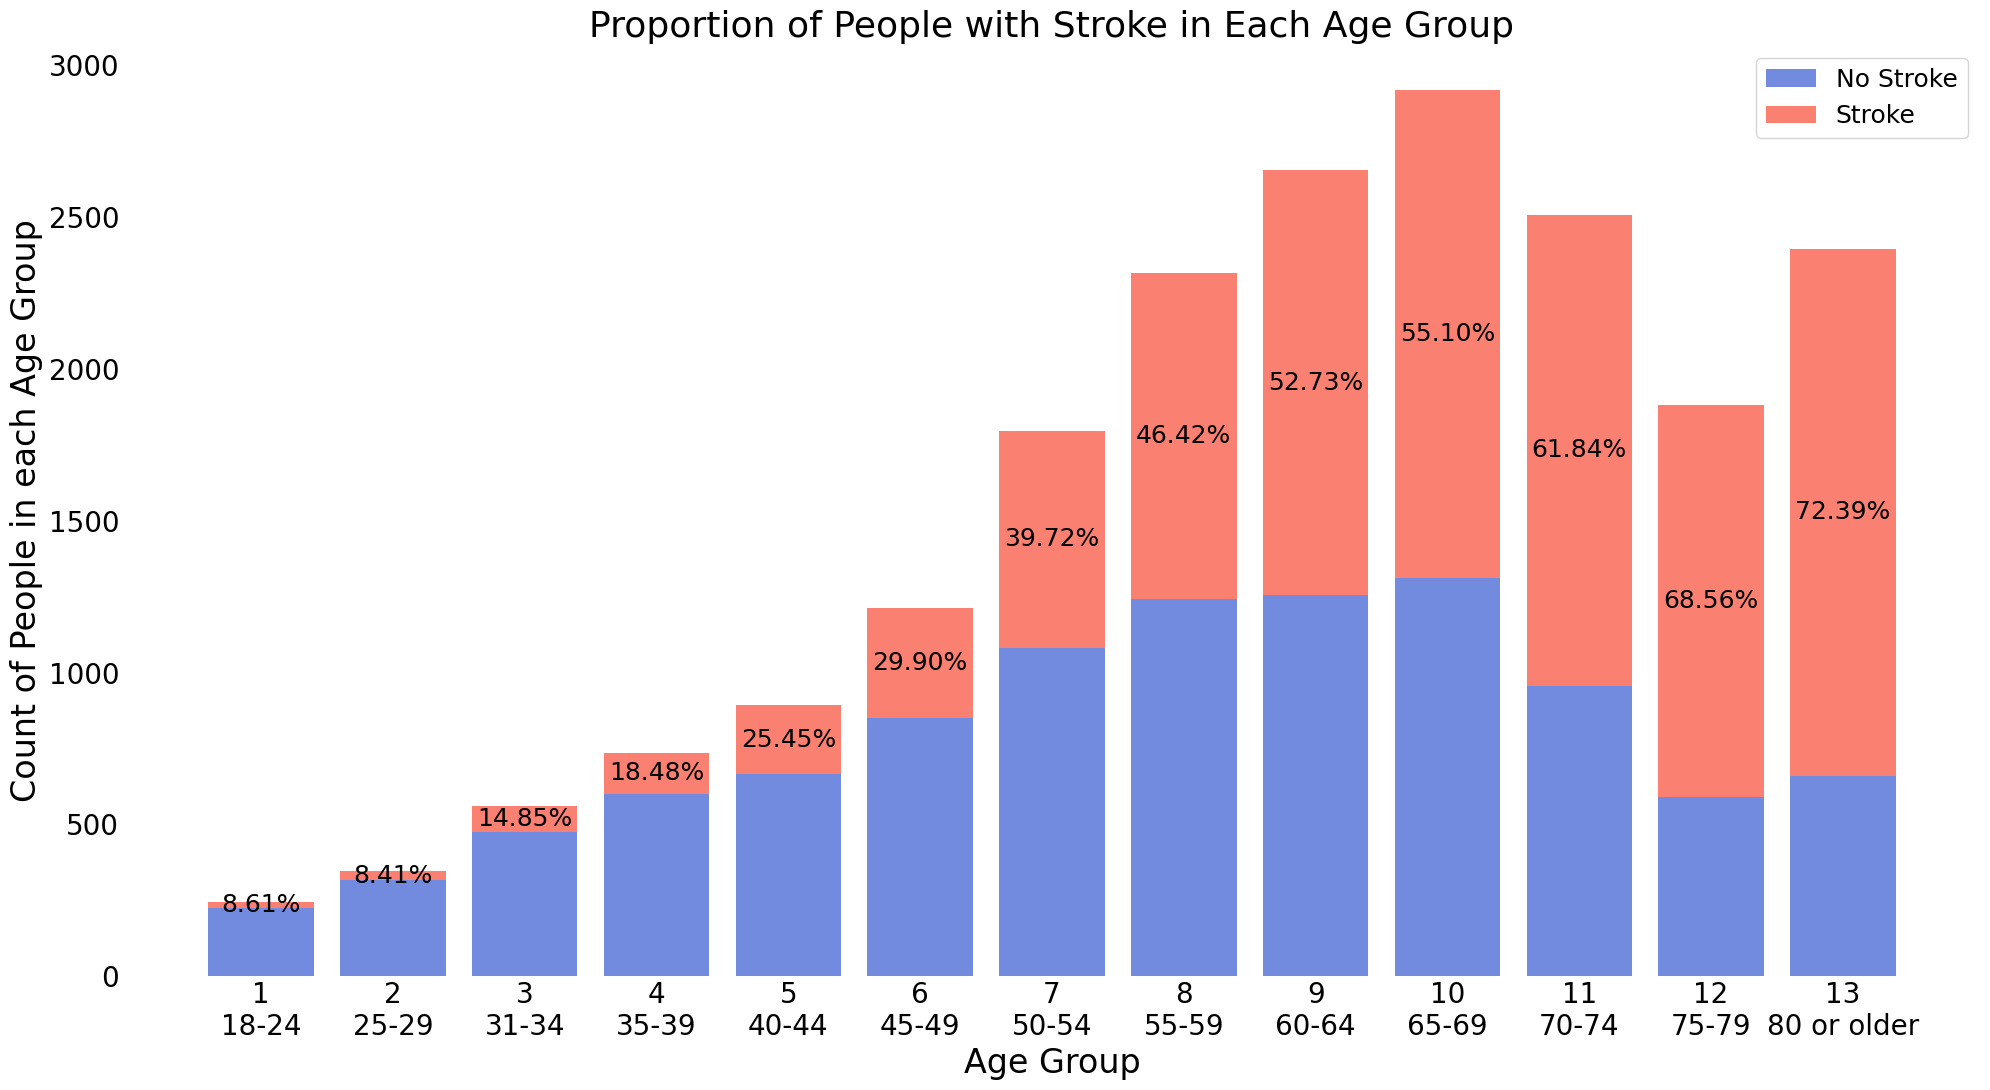

In [28]:
# Count the number of occurrences for each income group
age_counts = df['age'].value_counts()
# Sort the order of income group index
age_counts = age_counts.sort_index()

# Calculate the percentage of stroke occurrence for each income group
stroke_pct = df.groupby('age')['stroke'].mean() * 100
stroke_pct = stroke_pct.reindex(age_counts.index)

# Calculate the count of people who experienced a stroke in each age group
stroke_count = stroke_pct/100 * age_counts
no_stroke_count = age_counts-stroke_count

# Create a figure with a single subplot (stacked bar chart)
fig, ax = plt.subplots(figsize=(20, 11))

# Plot the stacked bar chart for stroke occurrence in each income group
bars1 = ax.bar(age_counts.index, age_counts, color='#738BDE', label='No Stroke', zorder=2)
bars2 = ax.bar(age_counts.index, stroke_count, bottom=no_stroke_count, color='salmon', label='Stroke', zorder=2)

# Label the axes and set the title
ax.set_xlabel('Age Group', fontsize=24)
ax.set_ylabel('Count of People in each Age Group', fontsize=24)
ax.set_title('Proportion of People with Stroke in Each Age Group', fontsize=26)
ax.legend()

# Add horizontal and vertical grid lines behind the bars
ax.grid(axis='both', linestyle='-', color='white', linewidth=0.5, zorder=5)

# Add percentage labels to the bars
for bar, pct in zip(bars2, stroke_pct):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{pct:.2f}%', ha='center', va='center', color='black', fontsize=18)

# Remove border lines around the entire plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove dashes from the ticks but keep the numbers
ax.tick_params(axis='both', which='both', length=0)

# Define annotations for each bar
annotations = ('18-24', '25-29', '31-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older')

# Set axis ticks and labels
ax.tick_params(axis='y', labelsize=20)
ax.set_xticks(age_counts.index)
ax.set_xticklabels([f'{annotation}\n{label}' for annotation, label in zip(age_counts.index, annotations)], fontsize=20)


fig.patch.set_facecolor('none') # Set plot background color to be transparent
ax.set_facecolor('none') # Set inner background of the plot to be transparent
ax.legend().get_frame().set_facecolor('none') # Set legend background color to be transparent

# Get legend object
legend = ax.legend(loc='upper right', fontsize=18)

# Set legend title font size
plt.setp(legend.get_title(), fontsize=18)

# Show the plot
plt.tight_layout()
plt.show()

**Interpretation:**

- Stroke occurrence increases as age increases.
- As a general trend, from age 45 onwards, the chances of getting a stroke increases by at least 10% every 10 years.

### Number of People in Each Education Group and Stroke Occurrence in Percentage(%)

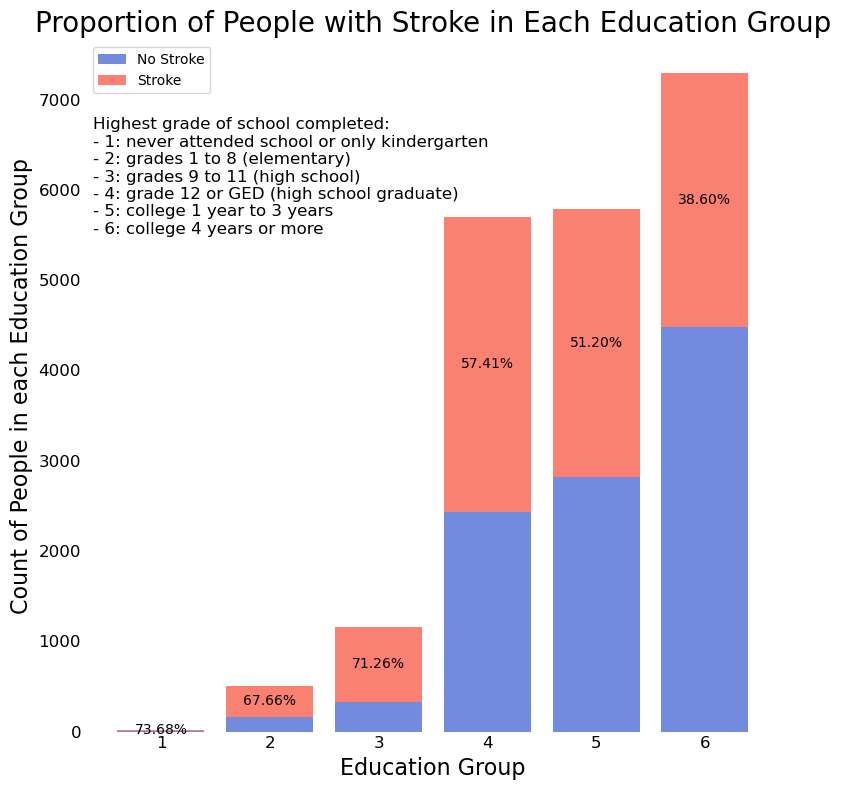

In [29]:
# Count the number of occurrences for each education group
Edu_counts = df['education'].value_counts()

# Reverse the order of education group values
Edu_counts = Edu_counts.iloc[::-1]

# Calculate the percentage of stroke occurrence for each education group
stroke_pct = df.groupby('education')['stroke'].mean() * 100
stroke_pct = stroke_pct.reindex(Edu_counts.index)

# Calculate the count of people who experienced a stroke in each education group
stroke_count = stroke_pct/100 * Edu_counts
no_stroke_count = Edu_counts-stroke_count

# Create a figure with a single subplot (stacked bar chart)
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the stacked bar chart for stroke occurrence in each education group
bars1 = ax.bar(Edu_counts.index, Edu_counts, color='#738BDE', label='No Stroke', zorder=2)
bars2 = ax.bar(Edu_counts.index, stroke_count, bottom=no_stroke_count, color='salmon', label='Stroke', zorder=2)

# Label the axes and set the title
ax.set_xlabel('Education Group', fontsize=16)
ax.set_ylabel('Count of People in each Education Group', fontsize=16)
ax.set_title('Proportion of People with Stroke in Each Education Group', fontsize=20)
ax.legend()


# Add the new legend for education levels
plt.text(0.01, 0.72, 'Highest grade of school completed:\n'
                '- 1: never attended school or only kindergarten\n'
                '- 2: grades 1 to 8 (elementary)\n'
                '- 3: grades 9 to 11 (high school)\n'
                '- 4: grade 12 or GED (high school graduate)\n'
                '- 5: college 1 year to 3 years\n'
                '- 6: college 4 years or more', fontsize=12, transform=ax.transAxes)


# Add horizontal and vertical grid lines behind the bars
ax.grid(axis='both', linestyle='-', color='white', linewidth=0.5, zorder=5)

# Add percentage Education labels to the bars
for bar, pct in zip(bars2, stroke_pct):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{pct:.2f}%', ha='center', va='center', color='black')

# Remove border lines around the entire plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove dashes from the ticks but keep the numbers
ax.tick_params(axis='both', which='both', length=0, labelsize=12)

fig.patch.set_facecolor('none') # Set plot background color to be transparent
ax.set_facecolor('none') # Set inner background of the plot to be transparent
ax.legend().get_frame().set_facecolor('none') # Set legend background color to be transparent

# Show the plot
plt.tight_layout()
plt.show()

**Interpretation:**

- Stroke occurrence decreases as people are more educated.
- However it is important to note that even in the higher education groups, stroke occurrence still remains at about 50%.

### Count of Stroke for Features That Are Risk Factors of Stroke

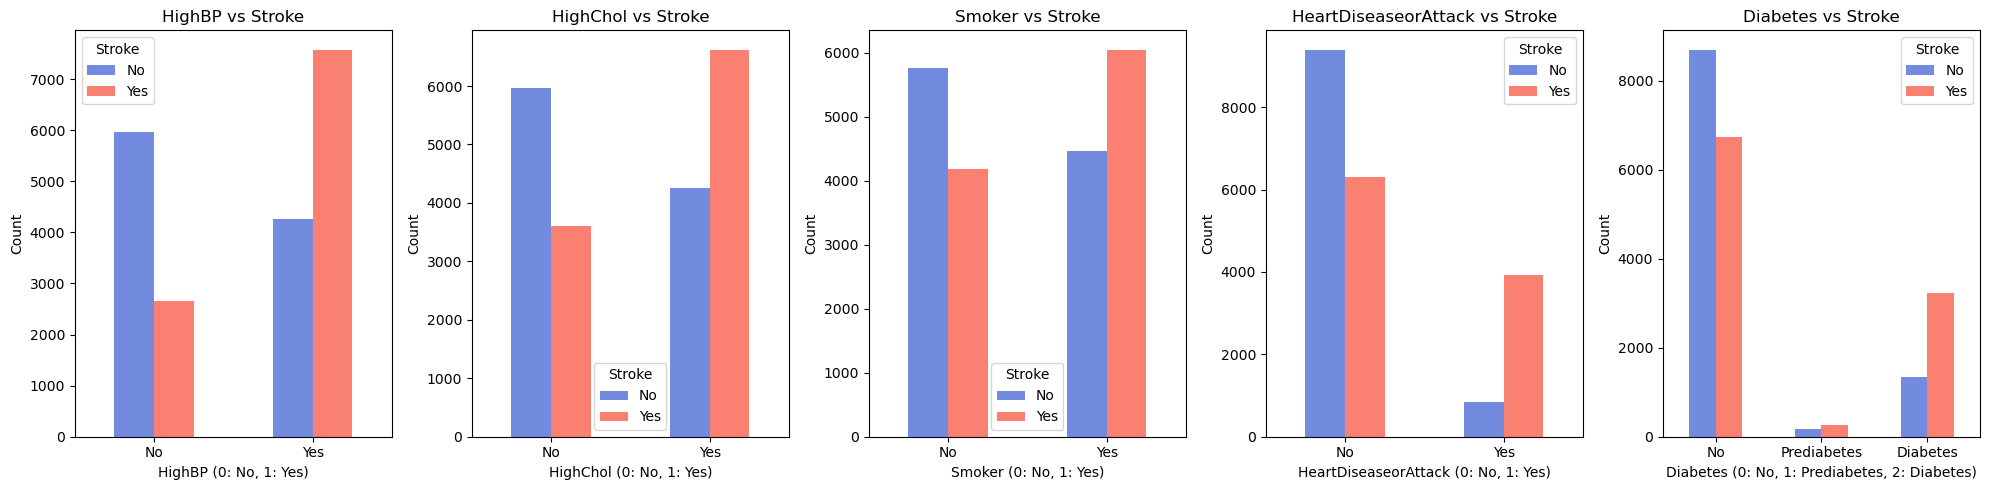

In [30]:
# Calculate the count of strokes for each feature group
counts_high_bp = df.groupby(['highbp', 'stroke']).size().unstack()
counts_high_chol = df.groupby(['highchol', 'stroke']).size().unstack()
counts_smoker = df.groupby(['smoker', 'stroke']).size().unstack()
counts_heart_disease = df.groupby(['heartdiseaseorattack', 'stroke']).size().unstack()
counts_diabetes = df.groupby(['diabetes_012', 'stroke']).size().unstack()

# Create a 1x5 subplot
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# Plot clustered bar charts for each feature
counts_high_bp.plot(kind='bar', ax=axs[0], color=['#738BDE', 'salmon'])
axs[0].set_title('HighBP vs Stroke')
axs[0].set_xlabel('HighBP (0: No, 1: Yes)')
axs[0].set_ylabel('Count')
axs[0].legend(title='Stroke', labels=['No', 'Yes'])
axs[0].set_xticklabels(['No', 'Yes'], rotation=0)

counts_high_chol.plot(kind='bar', ax=axs[1], color=['#738BDE', 'salmon'])
axs[1].set_title('HighChol vs Stroke')
axs[1].set_xlabel('HighChol (0: No, 1: Yes)')
axs[1].set_ylabel('Count')
axs[1].legend(title='Stroke', labels=['No', 'Yes'])
axs[1].set_xticklabels(['No', 'Yes'], rotation=0)

counts_smoker.plot(kind='bar', ax=axs[2], color=['#738BDE', 'salmon'])
axs[2].set_title('Smoker vs Stroke')
axs[2].set_xlabel('Smoker (0: No, 1: Yes)')
axs[2].set_ylabel('Count')
axs[2].legend(title='Stroke', labels=['No', 'Yes'])
axs[2].set_xticklabels(['No', 'Yes'], rotation=0)

counts_heart_disease.plot(kind='bar', ax=axs[3], color=['#738BDE', 'salmon'])
axs[3].set_title('HeartDiseaseorAttack vs Stroke')
axs[3].set_xlabel('HeartDiseaseorAttack (0: No, 1: Yes)')
axs[3].set_ylabel('Count')
axs[3].legend(title='Stroke', labels=['No', 'Yes'])
axs[3].set_xticklabels(['No', 'Yes'], rotation=0)

counts_diabetes.plot(kind='bar', ax=axs[4], color=['#738BDE', 'salmon'])
axs[4].set_title('Diabetes vs Stroke')
axs[4].set_xlabel('Diabetes (0: No, 1: Prediabetes, 2: Diabetes)')
axs[4].set_ylabel('Count')
axs[4].legend(title='Stroke', labels=['No', 'Yes'])
axs[4].set_xticklabels(['No', 'Prediabetes', 'Diabetes'], rotation=0)

fig.patch.set_facecolor('none') # Set plot background color to be transparent
ax.set_facecolor('none') # Set inner background of the plot to be transparent
ax.legend().get_frame().set_facecolor('none') # Set legend background color to be transparent

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

**Interpretation:**

- It is evident that in all the plots above, stroke occurrence increases drastically if the surveyee had either High Blood Pressure, High Cholesterol, Smokes or experienced a heart diseases or attack.

Next, we explore the boxplots for `bmi`, `genhlth`, `menthlth`, `physhlth` and `age`.

---

# 3. Box plots

In [31]:
# Set list of columns to run for loop for generating box plots
col_list = ['bmi','genhlth','menthlth','physhlth','age','income']

# Set the desired font size
font_size = 12

# Get boxplots for list of columns
for column in col_list:
    if df[column].nunique() > 0:
        fig = px.box(df, x=column, y='stroke', orientation='h')
        fig.update_layout(
            yaxis_title='Stroke Label',
            xaxis_title=column,
            font=dict(size=font_size),
            xaxis=dict(tickfont=dict(size=font_size)),
            yaxis=dict(tickfont=dict(size=font_size)),
            height=400,  # Set the plot height
            width=900  # Set the plot width
        )
        fig.update_traces(marker_color='#738BDE')  # Update the color of the box plots
        fig.show()

**Observations & Insights**

Y-Axis Legend:
* 0 refers to No Stroke
* 1 refers to Stroke

For `bmi`:
- Generally similar in median and interquartile range (IQR) for both Stroke and No Stroke.
- We can see most outliers where the BMI is more than 41 (extreme obesity).
- People who are extremely obese may or may not have stroke

For `genhlth` (5 is poor and 1 is excellent):
- Boxplot for No Stroke is lower than for Stroke, suggesting that people who generally feel that their health is good, tend to have a lower chance of getting stroke. Most people feel their general health is between excellent and fair.
- Boxplot for Stroke is higher than for No Stroke, suggesting that people who generally feel that their health is not good, tend to have a higher chance of getting stroke.
- Outliers for No Stroke are cases where they feel their general health is poor (Value = 5), suggesting that even though they've never had a stroke their general health may be poor due to other factors
- Outliers for Stroke are cases where they feel their general health is excellent (Value = 1), suggesting that even though they previously had a stroke, they feel their general health is excellent, possibly due to other factors

For `menthlth`:
- Refers to how many days out of the last 30 days patient faces problems with mental health, which includes stress, depression, and problems with emotions.
- IQR & upper fence value in boxplot for No Stroke is lower than for Stroke, suggesting that people who face less frequent problems with mental health, have lower chance of getting stroke.
- Outliers for those in No Stroke start from days > 5 and for those in Stroke start from days > 12. This might be an indicator that people may not be very good at determining the number of days that they face problems with their mental health. It might have been better if the surveyees were asked to provide their answers in ranges of 1 week (i.e. 1/2/3/4 weeks)

For `physhlth`:
- Refers to how many days out of the last 30 days patient faces problems with physical health, which includes physical illness and injury.
- IQR & upper fence value in boxplot for No Stroke is starkly lower than for Stroke, suggesting that people who face less frequent problems with physical health, have lower chance of getting stroke.
- Outliers for those in No Stroke start from days > 5. This might be an indicator that people may not be very good at determining the number of days that they face problems with their physical health. It might have been better if the surveyees were asked to provide their answers in ranges of 1 week (i.e. 1/2/3/4 weeks)
- Boxplot for Stroke has a large IQR, suggesting that either they may not be very good at determining the number of days that they face physical health problems, or that stroke is more strongly related to internal physical factors that cannot be felt or seen by the surveyee.
- No Outliers for those in Stroke.

For `age`:
- IQR & Median for No Stroke is lower than for Stroke, suggesting that older people have higher chance of getting stroke.
- Lower fence for Stroke is where people are in the age range of 25-29 years & the outlier is where people are in the age range of 18-24 years. This is an indication that stroke can happen even at young adulthood.

For `income`:
- IQR & Median for No Stroke is higher than for Stroke, suggesting that people with higher income have lower chance of getting stroke.
- No outliers present.

---

# **Part 3 - Conclusion for This Notebook**

**Summary of Actions**

- We began by giving information to explain our project.
- We then performed data cleaning to prepare the data for more accurate EDA and for modelling in the next notebook.
- Our EDA gave us a better idea of our data, with the general idea that people who have had stroke before, tend to have poorer health attributes, are from lower income group, and are older.
- In the next notebook, we will start on our modelling.